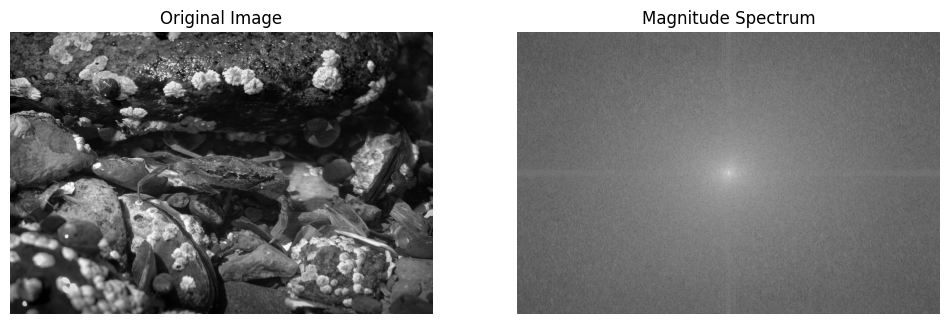

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_2d_fourier_transform(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

    # Compute the magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  # Add 1 to avoid log(0)

    # Display the original image and its magnitude spectrum
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Magnitude Spectrum")
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis('off')

    plt.show()

# Example usage:
# Provide the path to the input image
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
compute_2d_fourier_transform(image_path)


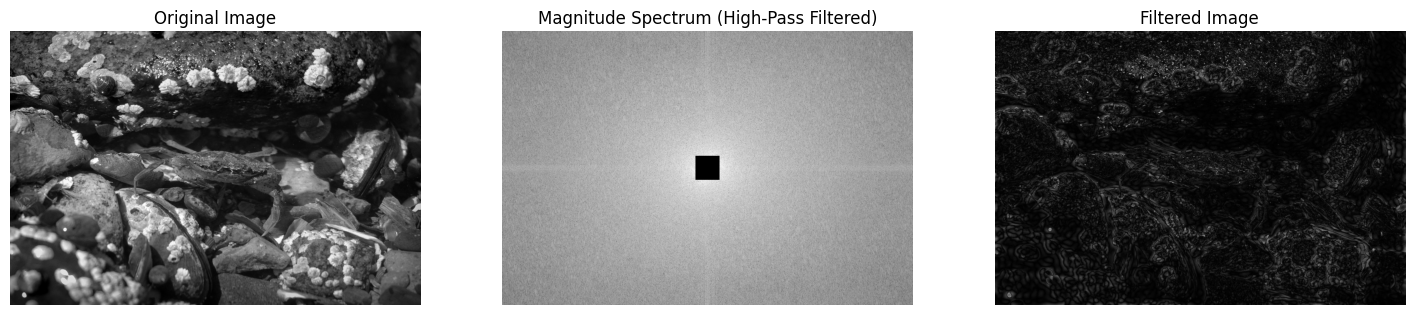

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_2d_fourier_transform_with_filter(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

    # Create a high-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center coordinates
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # Block low frequencies

    # Apply the high-pass filter
    f_shift_filtered = f_shift * mask

    # Compute the inverse Fourier Transform
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    filtered_image = np.fft.ifft2(f_ishift)
    filtered_image = np.abs(filtered_image)

    # Compute the magnitude spectrum of the filtered transform
    magnitude_spectrum_filtered = 20 * np.log(np.abs(f_shift_filtered) + 1)  # Add 1 to avoid log(0)

    # Display the original image, magnitude spectrum, and filtered image
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Magnitude Spectrum (High-Pass Filtered)")
    plt.imshow(magnitude_spectrum_filtered, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Filtered Image")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()

# Example usage:
# Provide the path to the input image
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
compute_2d_fourier_transform_with_filter(image_path)

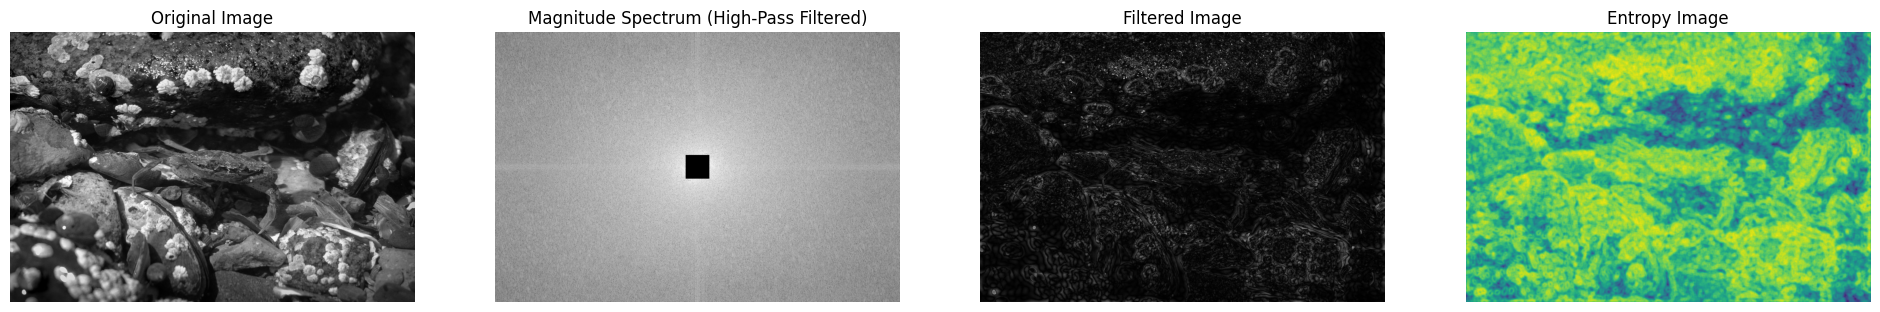

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk

def compute_2d_fourier_transform_with_filter_and_entropy(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

    # Create a high-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center coordinates
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # Block low frequencies

    # Apply the high-pass filter
    f_shift_filtered = f_shift * mask

    # Compute the inverse Fourier Transform
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    filtered_image = np.fft.ifft2(f_ishift)
    filtered_image = np.abs(filtered_image)

    # Compute the magnitude spectrum of the filtered transform
    magnitude_spectrum_filtered = 20 * np.log(np.abs(f_shift_filtered) + 1)  # Add 1 to avoid log(0)

    # Perform local entropy analysis
    filtered_image_normalized = (filtered_image / np.max(filtered_image) * 255).astype(np.uint8)  # Normalize for entropy
    entropy_image = entropy(filtered_image_normalized, disk(5))

    # Display the original image, magnitude spectrum, filtered image, and entropy image
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title("Magnitude Spectrum (High-Pass Filtered)")
    plt.imshow(magnitude_spectrum_filtered, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Filtered Image")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("Entropy Image")
    plt.imshow(entropy_image, cmap='viridis')
    plt.axis('off')

    plt.show()

# Example usage:
# Provide the path to the input image
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
compute_2d_fourier_transform_with_filter_and_entropy(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


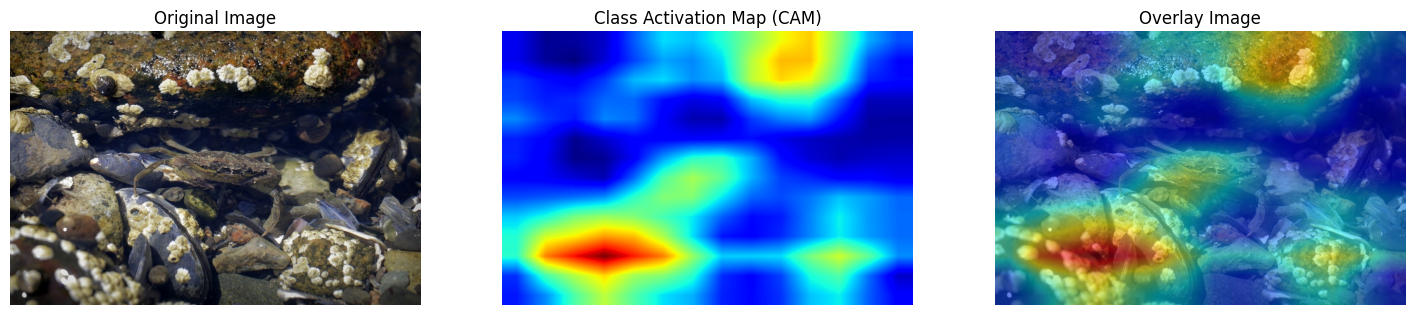

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

def generate_cam_and_apply_gap(image_path, model_weights='imagenet'):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    img_resized = cv2.resize(img, (224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Load the VGG16 model
    base_model = VGG16(weights=model_weights)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer("block5_conv3").output)

    # Get feature maps
    feature_maps = model.predict(img_array)

    # Apply Global Average Pooling (GAP)
    gap = np.mean(feature_maps, axis=(1, 2))

    # Generate a Class Activation Map (CAM)
    weights = gap[0]  # Weights after GAP
    cam = np.dot(feature_maps[0], weights)

    # Normalize CAM
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()  # Scale between 0 and 1
    cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))

    # Overlay CAM on the original image
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)

    # Display results
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Class Activation Map (CAM)")
    plt.imshow(cam_resized, cmap='jet')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Overlay Image")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Example usage:
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
generate_cam_and_apply_gap(image_path)

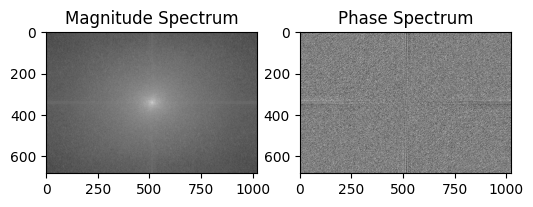

ValueError: operands could not be broadcast together with shapes (683,) (1024,) 

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
import tensorflow as tf
from tensorflow.keras.models import Model

# Step 1: Compute the 2D Fourier transform of the input image
def compute_fourier_transform(image):
    # Convert image to grayscale if it is colored
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform 2D Fourier transform
    f_transform = np.fft.fftshift(np.fft.fft2(image))
    magnitude_spectrum = np.abs(f_transform)
    phase_spectrum = np.angle(f_transform)
    
    # Display the Fourier Transform results
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.subplot(1, 2, 2)
    plt.imshow(phase_spectrum, cmap='gray')
    plt.title("Phase Spectrum")
    plt.show()
    
    return f_transform, magnitude_spectrum, phase_spectrum

# Step 2: Apply high-pass filtering to the amplitude spectrum
def high_pass_filter(magnitude_spectrum, cutoff=0.1):
    rows, cols = magnitude_spectrum.shape
    crow, ccol = rows // 2, cols // 2
    high_pass = np.ones((rows, cols))
    
    # Create a circular mask for high-pass filtering
    r = cutoff * np.sqrt((crow - np.arange(rows))**2 + (ccol - np.arange(cols))**2)
    high_pass[crow - int(r):crow + int(r), ccol - int(r):ccol + int(r)] = 0
    
    filtered_magnitude = magnitude_spectrum * high_pass
    
    # Display the high-pass filtered magnitude spectrum
    plt.figure(figsize=(6, 6))
    plt.imshow(np.log(filtered_magnitude + 1), cmap='gray')
    plt.title("High-pass Filtered Magnitude Spectrum")
    plt.show()
    
    return filtered_magnitude

# Step 3: Perform local entropy analysis
def local_entropy(image, size=5):
    entropy_image = ndimage.entropy(image, size=size)
    
    # Display the entropy image
    plt.figure(figsize=(6, 6))
    plt.imshow(entropy_image, cmap='jet')
    plt.title("Local Entropy Image")
    plt.colorbar()
    plt.show()
    
    return entropy_image

# Step 4: Generate Class Activation Map (CAM) and apply Global Average Pooling (GAP)
def generate_cam(model, image):
    # Prepare image for model input
    image_input = np.expand_dims(image, axis=0)
    image_input = tf.image.resize(image_input, (224, 224))  # Assuming the model accepts 224x224 inputs
    image_input = image_input / 255.0
    
    # Get model's last convolutional layer output
    last_conv_layer = model.get_layer('conv2d')  # Adjust based on your model's architecture
    grad_model = Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image_input)
        loss = predictions[:, np.argmax(predictions[0])]
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    cam = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    
    # Resize CAM to match image size
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam.numpy(), (image.shape[1], image.shape[0]))
    cam = cam / cam.max()
    
    # Display the CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cam, cmap='jet')
    plt.title("Class Activation Map (CAM)")
    plt.colorbar()
    plt.show()
    
    return cam

# Step 5: Combine outputs from 2D Fourier transform/entropy and CAM/GAP
def combine_outputs(fourier_output, entropy_output, cam_output):
    # You can use a simple linear merge like weighted sum
    combined_output = 0.5 * fourier_output + 0.5 * entropy_output
    combined_output = np.expand_dims(combined_output, axis=-1)  # Ensure it's a single channel
    combined_output = np.concatenate([combined_output, cam_output], axis=-1)
    
    # Display the final combined output
    plt.figure(figsize=(6, 6))
    plt.imshow(combined_output[:, :, 0], cmap='gray')
    plt.title("Combined Output (Fourier + Entropy + CAM)")
    plt.colorbar()
    plt.show()
    
    return combined_output

# Main process
def process_image(image, model):
    # Compute 2D Fourier Transform
    f_transform, magnitude_spectrum, phase_spectrum = compute_fourier_transform(image)
    
    # Apply high-pass filtering
    high_passed_magnitude = high_pass_filter(magnitude_spectrum)
    
    # Perform local entropy analysis
    entropy_image = local_entropy(image)
    
    # Generate CAM
    cam_output = generate_cam(model, image)
    
    # Combine outputs using a linear merger function
    combined_output = combine_outputs(high_passed_magnitude, entropy_image, cam_output)
    
    return combined_output

# Example Usage
# Load the input image
image = cv2.imread(r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg")

# Load a pretrained model (e.g., ResNet50)
model = tf.keras.applications.ResNet50(weights='imagenet')

# Process the image
combined_output = process_image(image, model)


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

def compute_2d_fourier_and_entropy(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # Create a high-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0

    # Apply the high-pass filter
    f_shift_filtered = f_shift * mask
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    filtered_image = np.abs(np.fft.ifft2(f_ishift))

    # Perform local entropy analysis
    filtered_image_normalized = (filtered_image / np.max(filtered_image) * 255).astype(np.uint8)
    entropy_image = entropy(filtered_image_normalized, disk(5))

    return f_shift, f_shift_filtered, filtered_image, entropy_image

def generate_cam_and_apply_gap(image_path, model_weights='imagenet'):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    img_resized = cv2.resize(img, (224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Load the VGG16 model
    base_model = VGG16(weights=model_weights)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer("block5_conv3").output)

    # Get feature maps
    feature_maps = model.predict(img_array)

    # Apply Global Average Pooling (GAP)
    gap = np.mean(feature_maps, axis=(1, 2))

    # Generate a Class Activation Map (CAM)
    weights = gap[0]
    cam = np.dot(feature_maps[0], weights)

    # Normalize CAM
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))

    return cam_resized

def linear_merge(entropy_image, cam_image):
    # Normalize the entropy image
    entropy_normalized = entropy_image / np.max(entropy_image)

    # Merge using a linear combination
    merged_image = 0.5 * entropy_normalized + 0.5 * cam_image

    return merged_image

def main(image_path):
    # Compute Fourier transform and entropy
    f_shift, f_shift_filtered, filtered_image, entropy_image = compute_2d_fourier_and_entropy(image_path)

    # Generate CAM and apply GAP
    cam_image = generate_cam_and_apply_gap(image_path)

    # Merge the outputs
    merged_image = linear_merge(entropy_image, cam_image)

    # Display results step by step
    plt.figure(figsize=(24, 12))

    plt.subplot(2, 4, 1)
    plt.title("Original Image")
    original_image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.title("Fourier Transform")
    plt.imshow(np.log(np.abs(f_shift) + 1), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.title("High-Pass Filtered Spectrum")
    plt.imshow(np.log(np.abs(f_shift_filtered) + 1), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.title("Filtered Image")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 5)
    plt.title("Entropy Image")
    plt.imshow(entropy_image, cmap='viridis')
    plt.axis('off')

    plt.subplot(2, 4, 6)
    plt.title("Class Activation Map (CAM)")
    plt.imshow(cam_image, cmap='jet')
    plt.axis('off')

    plt.subplot(2, 4, 7)
    plt.title("Merged Image")
    plt.imshow(merged_image, cmap='hot')
    plt.axis('off')

    plt.show()

# Example usage
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
main(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


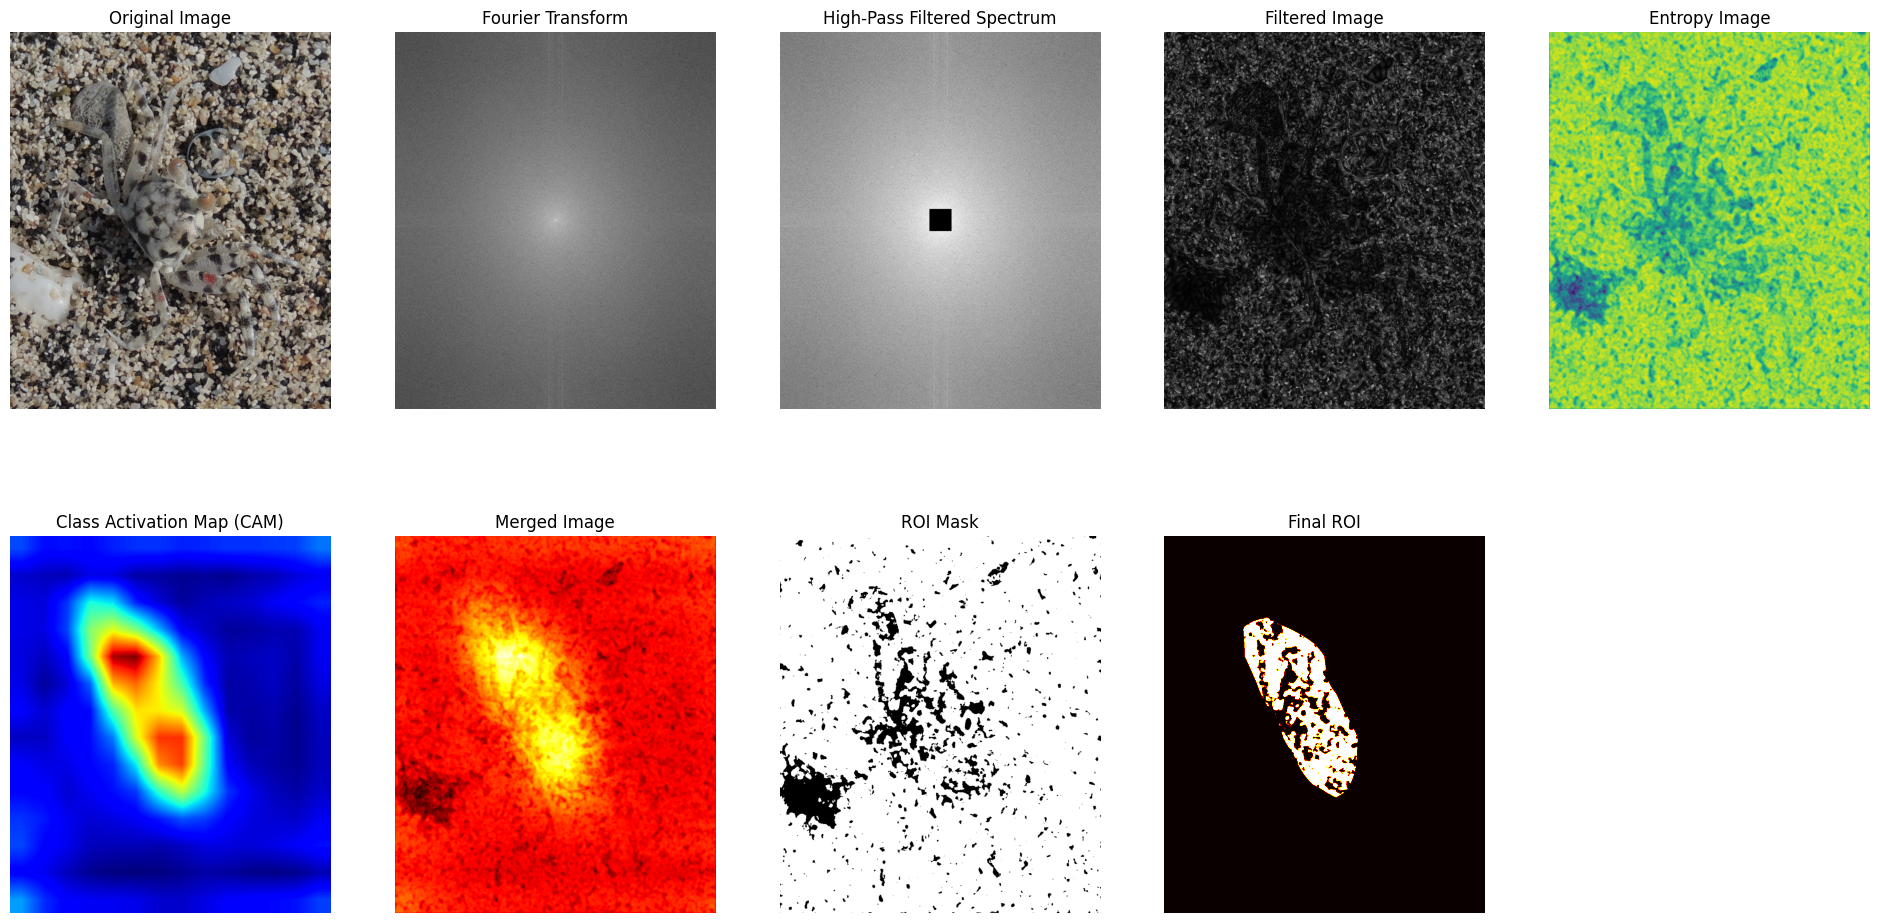

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

def compute_2d_fourier_and_entropy(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # Create a high-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0

    # Apply the high-pass filter
    f_shift_filtered = f_shift * mask
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    filtered_image = np.abs(np.fft.ifft2(f_ishift))

    # Perform local entropy analysis
    filtered_image_normalized = (filtered_image / np.max(filtered_image) * 255).astype(np.uint8)
    entropy_image = entropy(filtered_image_normalized, disk(5))

    return f_shift, f_shift_filtered, filtered_image, entropy_image

def generate_cam_and_apply_gap(image_path, model_weights='imagenet'):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    img_resized = cv2.resize(img, (224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Load the VGG16 model
    base_model = VGG16(weights=model_weights)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer("block5_conv3").output)

    # Get feature maps
    feature_maps = model.predict(img_array)

    # Apply Global Average Pooling (GAP)
    gap = np.mean(feature_maps, axis=(1, 2))

    # Generate a Class Activation Map (CAM)
    weights = gap[0]
    cam = np.dot(feature_maps[0], weights)

    # Normalize CAM
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))

    return cam_resized

def linear_merge(entropy_image, cam_image):
    # Normalize the entropy image
    entropy_normalized = entropy_image / np.max(entropy_image)

    # Merge using a linear combination
    merged_image = 0.5 * entropy_normalized + 0.5 * cam_image

    return merged_image

def roi_selection(entropy_image, gamma=0.9):
    # Perform histogram analysis to determine ROI
    hist, bin_edges = np.histogram(entropy_image, bins=256, range=(0, 256))
    alpha = np.percentile(entropy_image, 100 * (1 - gamma))

    # Threshold for ROI
    roi_mask = (entropy_image >= alpha).astype(np.uint8)

    return roi_mask

def main(image_path):
    # Compute Fourier transform and entropy
    f_shift, f_shift_filtered, filtered_image, entropy_image = compute_2d_fourier_and_entropy(image_path)

    # Generate CAM and apply GAP
    cam_image = generate_cam_and_apply_gap(image_path)

    # Merge the outputs
    merged_image = linear_merge(entropy_image, cam_image)

    # Determine ROI using local entropy
    roi_mask = roi_selection(entropy_image)

    # Create final ROI by combining CAM and entropy-based ROI
    final_roi = (roi_mask * cam_image) > 0.5

    # Display results step by step
    plt.figure(figsize=(24, 12))

    plt.subplot(2, 5, 1)
    plt.title("Original Image")
    original_image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 5, 2)
    plt.title("Fourier Transform")
    plt.imshow(np.log(np.abs(f_shift) + 1), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 3)
    plt.title("High-Pass Filtered Spectrum")
    plt.imshow(np.log(np.abs(f_shift_filtered) + 1), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 4)
    plt.title("Filtered Image")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 5)
    plt.title("Entropy Image")
    plt.imshow(entropy_image, cmap='viridis')
    plt.axis('off')

    plt.subplot(2, 5, 6)
    plt.title("Class Activation Map (CAM)")
    plt.imshow(cam_image, cmap='jet')
    plt.axis('off')

    plt.subplot(2, 5, 7)
    plt.title("Merged Image")
    plt.imshow(merged_image, cmap='hot')
    plt.axis('off')

    plt.subplot(2, 5, 8)
    plt.title("ROI Mask")
    plt.imshow(roi_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 9)
    plt.title("Final ROI")
    plt.imshow(final_roi, cmap='hot')
    plt.axis('off')

    plt.show()

# Example usage
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-33.jpg"
main(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


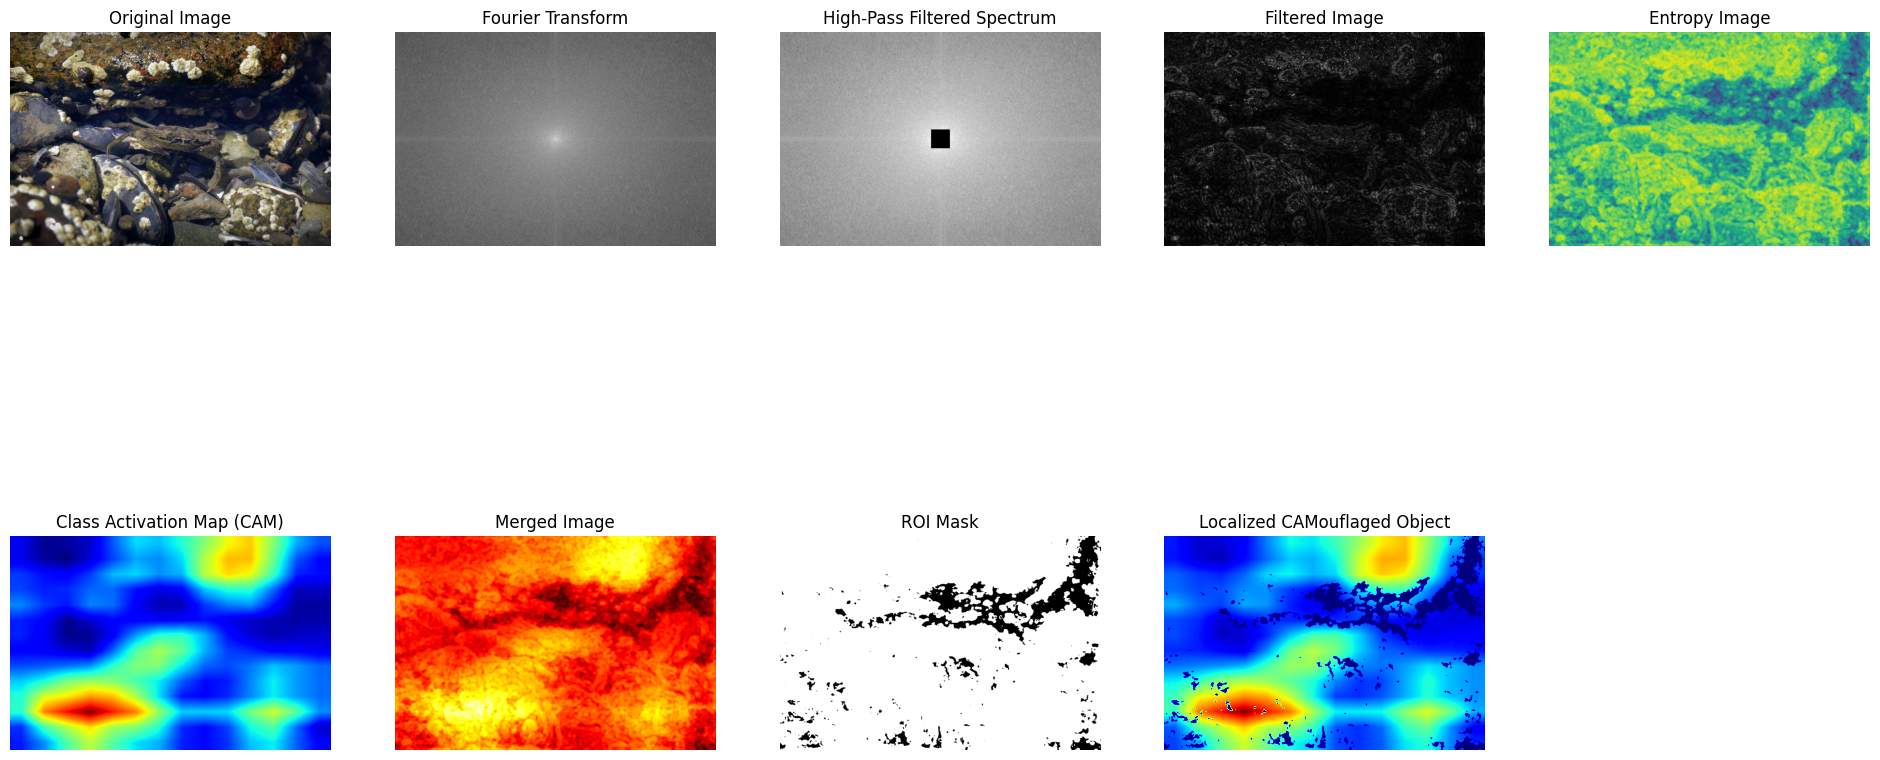

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

def compute_2d_fourier_and_entropy(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # Create a high-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # Small low-pass region in the center

    # Apply the high-pass filter
    f_shift_filtered = f_shift * mask
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    filtered_image = np.abs(np.fft.ifft2(f_ishift))

    # Perform local entropy analysis
    filtered_image_normalized = (filtered_image / np.max(filtered_image) * 255).astype(np.uint8)
    entropy_image = entropy(filtered_image_normalized, disk(5))

    return f_shift, f_shift_filtered, filtered_image, entropy_image

def generate_cam_and_apply_gap(image_path, model_weights='imagenet'):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"The image at path {image_path} could not be loaded.")

    img_resized = cv2.resize(img, (224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Load the VGG16 model
    base_model = VGG16(weights=model_weights)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer("block5_conv3").output)

    # Get feature maps
    feature_maps = model.predict(img_array)

    # Apply Global Average Pooling (GAP)
    gap = np.mean(feature_maps, axis=(1, 2))

    # Generate a Class Activation Map (CAM)
    weights = gap[0]
    cam = np.dot(feature_maps[0], weights)

    # Normalize CAM
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))

    return cam_resized

def linear_merge(entropy_image, cam_image):
    # Normalize the entropy image
    entropy_normalized = entropy_image / np.max(entropy_image)

    # Merge using a linear combination
    merged_image = 0.5 * entropy_normalized + 0.5 * cam_image

    return merged_image

def roi_selection(entropy_image, gamma=0.9):
    # Perform histogram analysis to determine ROI
    hist, bin_edges = np.histogram(entropy_image, bins=256, range=(0, 256))
    alpha = np.percentile(entropy_image, 100 * (1 - gamma))

    # Threshold for ROI
    roi_mask = (entropy_image >= alpha).astype(np.uint8)

    return roi_mask

def output_localized_camouflaged_object(cam_image, roi_mask):
    # Apply the ROI mask to the CAM image
    localized_image = cam_image * roi_mask
    return localized_image

def main(image_path):
    # Compute Fourier transform and entropy
    f_shift, f_shift_filtered, filtered_image, entropy_image = compute_2d_fourier_and_entropy(image_path)

    # Generate CAM and apply GAP
    cam_image = generate_cam_and_apply_gap(image_path)

    # Merge the outputs
    merged_image = linear_merge(entropy_image, cam_image)

    # Determine ROI using local entropy
    roi_mask = roi_selection(entropy_image)

    # Output the localized version of the camouflaged object
    localized_image = output_localized_camouflaged_object(cam_image, roi_mask)

    # Display results step by step
    plt.figure(figsize=(24, 12))

    plt.subplot(2, 5, 1)
    plt.title("Original Image")
    original_image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 5, 2)
    plt.title("Fourier Transform")
    plt.imshow(np.log(np.abs(f_shift) + 1), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 3)
    plt.title("High-Pass Filtered Spectrum")
    plt.imshow(np.log(np.abs(f_shift_filtered) + 1), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 4)
    plt.title("Filtered Image")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 5)
    plt.title("Entropy Image")
    plt.imshow(entropy_image, cmap='viridis')
    plt.axis('off')

    plt.subplot(2, 5, 6)
    plt.title("Class Activation Map (CAM)")
    plt.imshow(cam_image, cmap='jet')
    plt.axis('off')

    plt.subplot(2, 5, 7)
    plt.title("Merged Image")
    plt.imshow(merged_image, cmap='hot')
    plt.axis('off')

    plt.subplot(2, 5, 8)
    plt.title("ROI Mask")
    plt.imshow(roi_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 9)
    plt.title("Localized CAMouflaged Object")
    plt.imshow(localized_image, cmap='jet')
    plt.axis('off')

    plt.show()

# Example usage
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
main(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


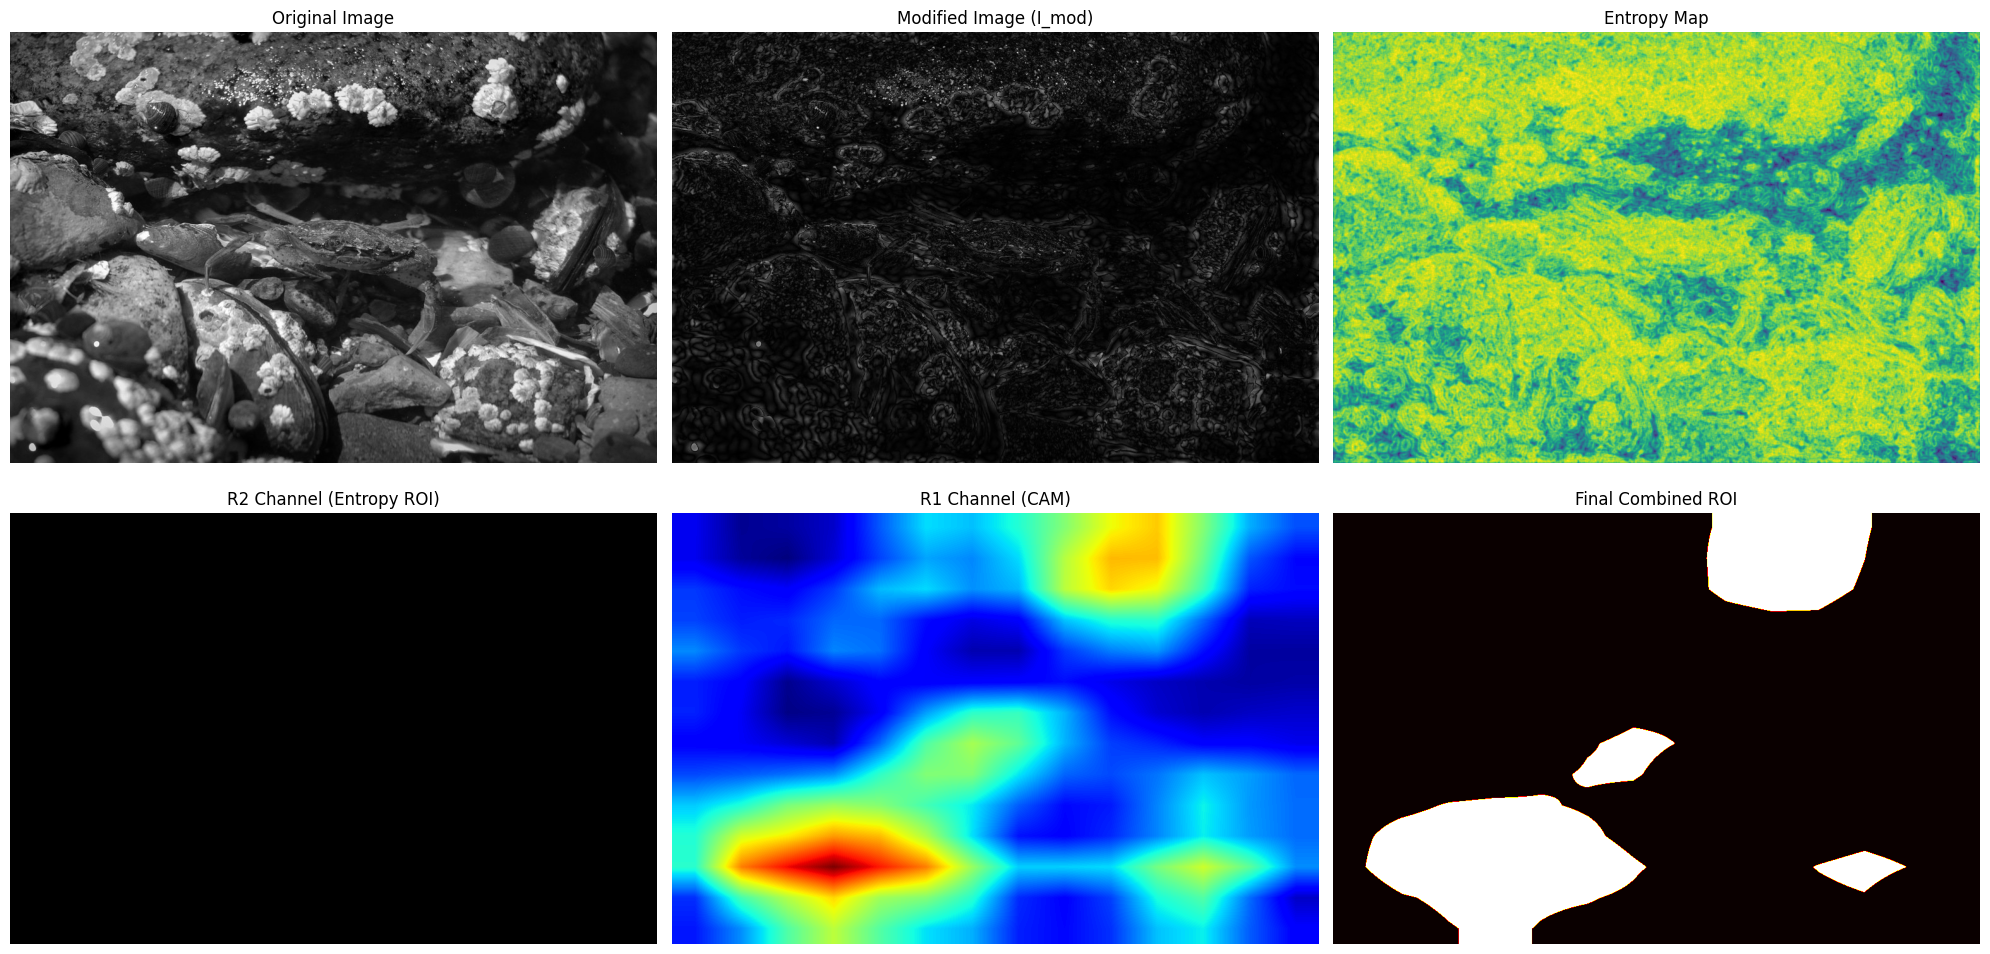

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.stats import entropy
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

def calculate_shannon_entropy(window):
    """
    Calculate Shannon entropy for a window as per paper's equation 3
    """
    # Calculate histogram for the window
    hist, _ = np.histogram(window, bins=256, range=(0, 255))
    # Convert to probabilities
    pk = hist / (window.shape[0] * window.shape[1])
    # Remove zero probabilities
    pk = pk[pk > 0]
    return -np.sum(pk * np.log2(pk))

def local_entropy_analysis(image, window_size=5):
    """
    Compute local entropy using sliding window as per paper
    """
    rows, cols = image.shape
    entropy_map = np.zeros((rows, cols))
    pad_size = window_size // 2
    
    # Pad image
    padded_image = np.pad(image, pad_size, mode='reflect')
    
    # Slide window and calculate entropy
    for i in range(rows):
        for j in range(cols):
            window = padded_image[i:i+window_size, j:j+window_size]
            entropy_map[i, j] = calculate_shannon_entropy(window)
            
    return entropy_map

def process_fourier(image):
    """
    Process Fourier transform using both phase and amplitude as per paper's equation 2
    """
    # Compute 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Get phase and amplitude
    phase = np.angle(f_shift)
    amplitude = np.abs(f_shift)
    
    # High-pass filter for amplitude
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0
    
    # Apply high-pass filter to amplitude
    amplitude_filtered = amplitude * mask
    
    # Reconstruct image using filtered amplitude and original phase
    f_reconstructed = amplitude_filtered * np.exp(1j * phase)
    i_mod = np.abs(np.fft.ifft2(np.fft.ifftshift(f_reconstructed)))
    
    return i_mod

def find_peaks(histogram):
    """
    Find peaks in histogram for multimodal analysis
    """
    peaks = []
    for i in range(1, len(histogram)-1):
        if histogram[i-1] < histogram[i] > histogram[i+1]:
            peaks.append((i, histogram[i]))
    return sorted(peaks, key=lambda x: x[1], reverse=True)

def roi_selection(entropy_image, gamma=0.9, beta=0.4):
    """
    ROI selection handling multimodal distributions as per paper
    """
    # Calculate histogram
    hist, bin_edges = np.histogram(entropy_image.flatten(), bins=256)
    
    # Find peaks
    peaks = find_peaks(hist)
    
    # Handle multimodal case
    if len(peaks) > 1 and peaks[1][1] > beta * peaks[0][1]:
        # Calculate distances from zero
        d1 = peaks[0][0]
        d2 = peaks[1][0]
        
        # Use peak with larger distance
        h_max = peaks[0][1] if d1 > d2 else peaks[1][1]
    else:
        h_max = peaks[0][1]
    
    # Calculate threshold
    threshold = gamma * h_max
    
    # Create ROI mask
    roi_mask = (entropy_image >= threshold).astype(np.uint8)
    
    return roi_mask

def generate_cam(image_path, model_weights='imagenet'):
    """
    Generate Class Activation Map using GAP as per paper
    """
    # Load and preprocess image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Load VGG16 model
    base_model = VGG16(weights=model_weights)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer("block5_conv3").output)

    # Get feature maps and apply GAP
    feature_maps = model.predict(img_array)
    gap = np.mean(feature_maps, axis=(1, 2))
    
    # Generate CAM
    cam = np.dot(feature_maps[0], gap[0])
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    
    return cv2.resize(cam, (img.shape[1], img.shape[0]))

def main(image_path):
    # Load image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}")
    
    # Channel R2: Fourier and Entropy
    i_mod = process_fourier(original_image)
    entropy_map = local_entropy_analysis(i_mod)
    r2_mask = roi_selection(entropy_map)
    
    # Channel R1: CAM + GAP
    cam_map = generate_cam(image_path)
    
    # Combine channels (R1 + R2 as per paper's Table 1)
    final_roi = r2_mask + (cam_map > 0.5).astype(np.uint8)
    final_roi = (final_roi > 0).astype(np.uint8)
    
    # Visualize results
    plt.figure(figsize=(20, 10))
    
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.title("Modified Image (I_mod)")
    plt.imshow(i_mod, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.title("Entropy Map")
    plt.imshow(entropy_map, cmap='viridis')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.title("R2 Channel (Entropy ROI)")
    plt.imshow(r2_mask, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.title("R1 Channel (CAM)")
    plt.imshow(cam_map, cmap='jet')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.title("Final Combined ROI")
    plt.imshow(final_roi, cmap='hot')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return final_roi

# Example usage
if __name__ == "__main__":
    image_path =  r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
    result = main(image_path)

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

def compute_2d_fourier_and_entropy(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} could not be loaded.")
    
    # Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Adaptive high-pass filter
    rows, cols = image.shape
    mask = np.ones((rows, cols), np.uint8)
    mask[rows//2-20:rows//2+20, cols//2-20:cols//2+20] = 0  # Reduce filter size
    
    # Apply filter
    f_shift_filtered = f_shift * mask
    filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_shift_filtered)))
    
    # Normalize filtered image
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Compute entropy
    entropy_image = entropy(filtered_image, disk(5))
    entropy_image = cv2.normalize(entropy_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    return f_shift, f_shift_filtered, filtered_image, entropy_image

def generate_gradcam(image_path):
    model = VGG16(weights='imagenet')
    last_conv_layer = model.get_layer("block5_conv3")
    grad_model = Model([model.input], [last_conv_layer.output, model.output])
    
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_array = preprocess_input(np.expand_dims(img_resized, axis=0))
    
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]
    
    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    cam = np.dot(conv_output[0], pooled_grads)
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))
    
    return cam_resized

def process_final_mask(entropy_image, cam_image):
    merged = 0.5 * (entropy_image / 255.0) + 0.5 * cam_image
    
    # Convert to binary mask using Otsu thresholding
    _, roi_mask = cv2.threshold(merged.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Morphological processing
    kernel = np.ones((5,5), np.uint8)
    roi_mask = cv2.morphologyEx(roi_mask, cv2.MORPH_CLOSE, kernel)
    
    return roi_mask

def main(image_path):
    f_shift, f_shift_filtered, filtered_image, entropy_image = compute_2d_fourier_and_entropy(image_path)
    cam_image = generate_gradcam(image_path)
    final_mask = process_final_mask(entropy_image, cam_image)
    
    # Display results
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 3, 1), plt.imshow(cv2.imread(image_path)[..., ::-1]), plt.title("Original Image"), plt.axis('off')
    plt.subplot(2, 3, 2), plt.imshow(np.log(np.abs(f_shift) + 1), cmap='gray'), plt.title("Fourier Transform"), plt.axis('off')
    plt.subplot(2, 3, 3), plt.imshow(filtered_image, cmap='gray'), plt.title("Filtered Image"), plt.axis('off')
    plt.subplot(2, 3, 4), plt.imshow(entropy_image, cmap='viridis'), plt.title("Entropy Image"), plt.axis('off')
    plt.subplot(2, 3, 5), plt.imshow(cam_image, cmap='jet'), plt.title("Grad-CAM"), plt.axis('off')
    plt.subplot(2, 3, 6), plt.imshow(final_mask, cmap='gray'), plt.title("Final Binary Mask"), plt.axis('off')
    plt.show()

# Example usage
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
main(image_path)


C:\Users\asg17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_292']. Received: the structure of inputs=*
  warnings.warn(


ValueError: operands could not be broadcast together with shapes (683,1024) (683,1024,512) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


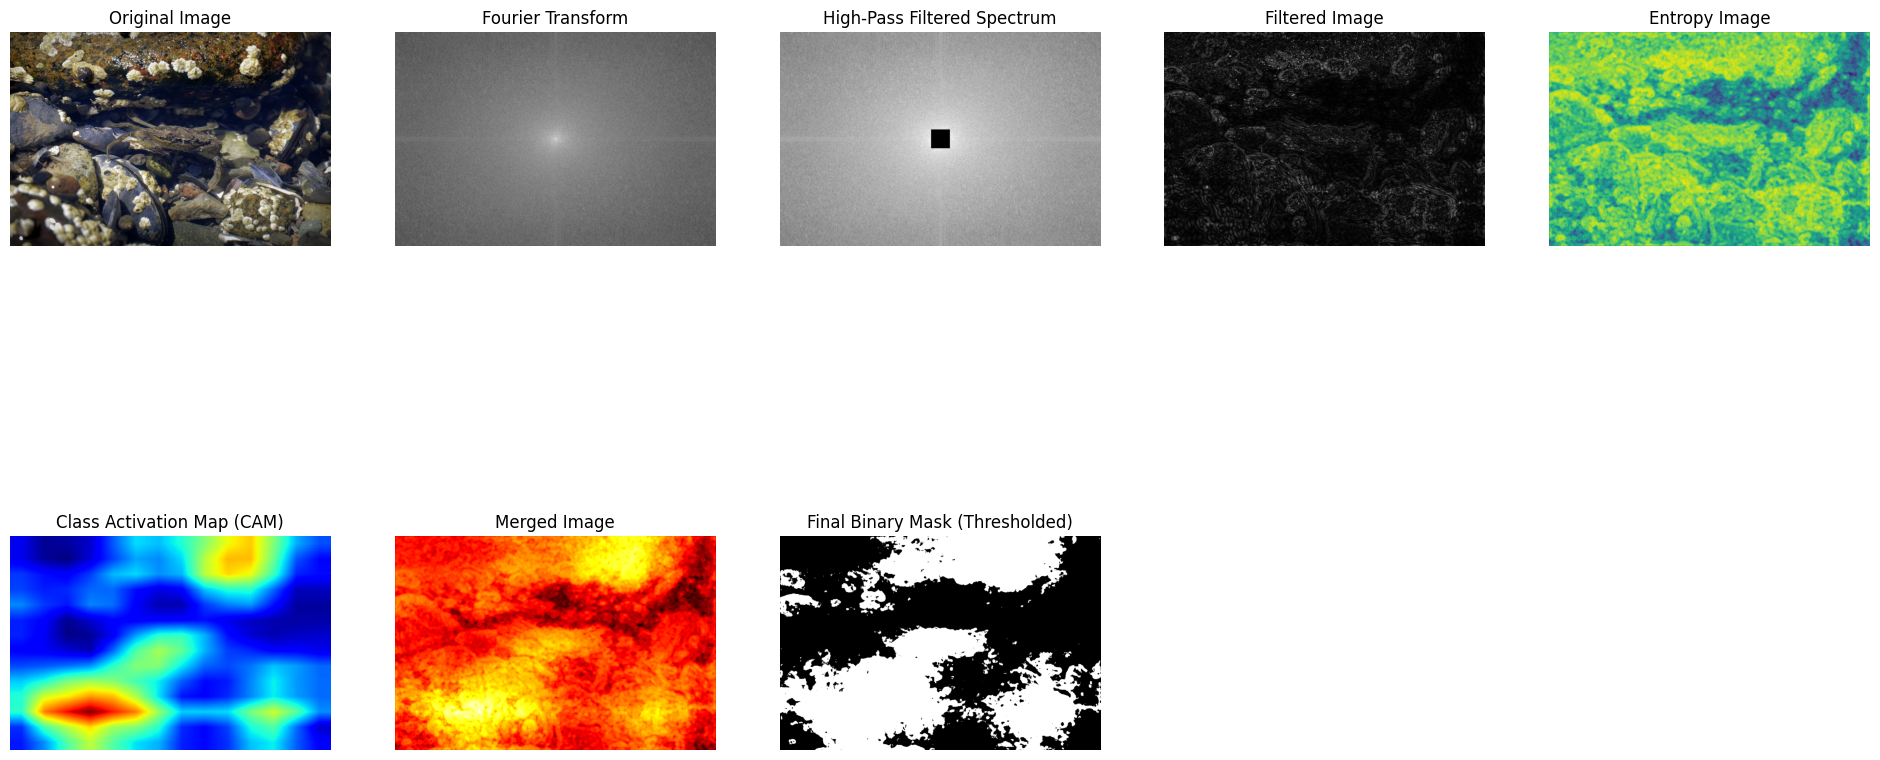

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

def compute_2d_fourier_and_entropy(image_path):
    """Compute Fourier Transform and Local Entropy."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}.")

    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # High-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # Block low frequencies

    f_shift_filtered = f_shift * mask
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    filtered_image = np.abs(np.fft.ifft2(f_ishift))

    # Compute Local Entropy
    filtered_image_normalized = (filtered_image / np.max(filtered_image) * 255).astype(np.uint8)
    entropy_image = entropy(filtered_image_normalized, disk(5))

    return f_shift, f_shift_filtered, filtered_image, entropy_image

def generate_cam(image_path, model_weights='imagenet'):
    """Generate Class Activation Map (CAM) using VGG16."""
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Could not load image at {image_path}.")

    img_resized = cv2.resize(img, (224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Load VGG16 model
    base_model = VGG16(weights=model_weights)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer("block5_conv3").output)

    # Extract feature maps
    feature_maps = model.predict(img_array)

    # Apply Global Average Pooling (GAP)
    gap = np.mean(feature_maps, axis=(1, 2))

    # Generate CAM
    cam = np.dot(feature_maps[0], gap[0])
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()  # Normalize

    # Resize to match input image size
    cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))

    return cam_resized

def merge_entropy_and_cam(entropy_image, cam_image):
    """Merge Local Entropy and CAM."""
    entropy_normalized = entropy_image / np.max(entropy_image)
    merged_image = 0.5 * entropy_normalized + 0.5 * cam_image  # Linear merge
    return merged_image

def segment_roi(merged_image):
    """Extract camouflaged object using Otsu's thresholding."""
    merged_image = (merged_image * 255).astype(np.uint8)
    _, binary_mask = cv2.threshold(merged_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_mask

def main(image_path):
    # Compute Fourier Transform and Local Entropy
    f_shift, f_shift_filtered, filtered_image, entropy_image = compute_2d_fourier_and_entropy(image_path)

    # Generate CAM
    cam_image = generate_cam(image_path)

    # Merge CAM and entropy images
    merged_image = merge_entropy_and_cam(entropy_image, cam_image)

    # Extract the camouflaged object as a binary mask
    final_binary_mask = segment_roi(merged_image)

    # Display results
    plt.figure(figsize=(24, 12))

    plt.subplot(2, 5, 1)
    plt.title("Original Image")
    original_image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 5, 2)
    plt.title("Fourier Transform")
    plt.imshow(np.log(np.abs(f_shift) + 1), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 3)
    plt.title("High-Pass Filtered Spectrum")
    plt.imshow(np.log(np.abs(f_shift_filtered) + 1), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 4)
    plt.title("Filtered Image")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, 5)
    plt.title("Entropy Image")
    plt.imshow(entropy_image, cmap='viridis')
    plt.axis('off')

    plt.subplot(2, 5, 6)
    plt.title("Class Activation Map (CAM)")
    plt.imshow(cam_image, cmap='jet')
    plt.axis('off')

    plt.subplot(2, 5, 7)
    plt.title("Merged Image")
    plt.imshow(merged_image, cmap='hot')
    plt.axis('off')

    plt.subplot(2, 5, 8)
    plt.title("Final Binary Mask (Thresholded)")
    plt.imshow(final_binary_mask, cmap='gray')
    plt.axis('off')

    plt.show()

# Example usage
image_path = r"D:\A-Major_project\Dataset\COD10K-v3\Test\Image\COD10K-CAM-1-Aquatic-3-Crab-40.jpg"
main(image_path)
